# STOR 601 Python Assignment

## Joe Rutherford

### Task 1 

We have $n$ men and $n$ women.

Man 1 is able to be paired with one of the $n$ women. After that pairing, Man 2 is able to be paired with one of the $(n-1)$ remaining women, and so on, until man $(n-1)$ is able to be paired with one of the 2 remaining women, and man $n$ is able to be paired with just the 1 remaining woman.

Therefore, the maximum number of matches is equal to $n \cdot (n-1) \cdot ... \cdot 2 \cdot 1 = n!$. These matches can be stable or unstable, and so the number of stable matches is bounded by the number of  overall matches. Hence, the upperbound of the maximum number of stable matchings is $n!$.

### Task 2

#### Part a

If we have two preference tables, one called men_choices and the other called women_choices, and a set of matchings, called pairings, the following code is able to identify if the matching is stable.

In [35]:
def IS_STABLE(men_choices,women_choices,pairings):
    V=[]
    for x in range(len(pairings)):
        m = pairings[x][0]
        w = pairings[x][1]
        i=men_choices[m].index(w)
        if i==0:
            V.append("T")
        else:
            men_preferred_choices=men_choices[m][:i]
            for p in men_preferred_choices:
                s = [i for i in pairings if p in i]
                h=s[0][0]
                if women_choices[p].index(m) < women_choices[p].index(h):
                    V.append("F")
                else: 
                    V.append("T")
    if "F" in V:
        return("Not stable")
    else:
        return("Stable")

By using the following two preference tables and two potential matching sets, the function IS_STABLE is able to identify whether each of them are stable matchings or not.

In [36]:
men_preferences = {
 'A':   ['F','G','H','I','J'],
 'B':   ['G','H','I','J','F'],
 'C':   ['H','I','J','F','G'],
 'D':   ['I','J','F','G','H'],
 'E':   ['J','F','G','H','I']
 }
women_preferences = {
    'F': ['B','C','D','E','A'],
    
    'G': ['C','D','E','A','B'],
    'H': ['D','E','A','B','C'],
    'I': ['E','A','B','C','D'],
    'J': ['A','B','C','D','E']
}
pairings_1 = [('A', 'F'),('B','G'),('C','H'),('D','I'),('E','J')]
pairings_2 = [('A', 'F'),('B','G'),('C','H'),('D','J'),('E','I')]
IS_STABLE(men_preferences,women_preferences,pairings_1)

'Stable'

In [37]:
IS_STABLE(men_preferences,women_preferences,pairings_2)

'Not stable'

The IS_STABLE function shows that for the two preference tables, the first set of matchings is stable, while the second set of matchings is not stable.

#### Part b

In the IS_STABLE function, the men_choices and women_choices inputs are dictionaries. These were chosen as dictionaries because it is an easy and efficient way to map each person to their own preferences, and it makes it easy to extract information from the keys and values from each preference table.

The pairings input is a list, where each element is a tuple containing the names of the two people paired for a marriage. A list was chosen to represent this because it is a good way to collect all of the marriages in one set.

At the start of the function, the list V is introduced, which finishes as a list of "T"s and "F"s. This is a list as, again, it is a good way to collect whether each individual marriage is stable or unstable, to eventually see whether the overall set of matchings is stable or not.

#### Part c

From the code given for the IS_STABLE function, it has two 'for' loops, one imbedded in the other. In the worst case scenario, each loop runs $n$ times, and due to one being imbedded in the other, the function has complexity $O(n^2)$.

### Task 3

#### Part a

If we have two preference tables, the STABLE_MATCHINGS function below is able to list all the stable matchings of those tables.

In [38]:
from itertools import permutations

def STABLE_MATCHINGS(men_choices,women_choices):

    all_pairings = [sorted(zip(i, women_choices)) for i in permutations(men_choices)]
    U=[]
    for pairings in all_pairings:
        V=[]
        for x in range(len(pairings)):
            m = pairings[x][0]
            w = pairings[x][1]
            i=men_choices[m].index(w)
            if i==0:
                V.append("T")
            else:
                men_preferred_choices=men_choices[m][:i]
                for p in men_preferred_choices:
                    s = [i for i in pairings if p in i]
                    h=s[0][0]
                    if women_choices[p].index(m) < women_choices[p].index(h):
                        V.append("F")
                    else: 
                        V.append("T")
        if "F" not in V:
            U.append(pairings)
    return(U)

This function can be tested on the two preference tables from task 2:

In [39]:
STABLE_MATCHINGS(men_preferences,women_preferences)

[[('A', 'F'), ('B', 'G'), ('C', 'H'), ('D', 'I'), ('E', 'J')],
 [('A', 'J'), ('B', 'F'), ('C', 'G'), ('D', 'H'), ('E', 'I')],
 [('A', 'I'), ('B', 'J'), ('C', 'F'), ('D', 'G'), ('E', 'H')],
 [('A', 'H'), ('B', 'I'), ('C', 'J'), ('D', 'F'), ('E', 'G')],
 [('A', 'G'), ('B', 'H'), ('C', 'I'), ('D', 'J'), ('E', 'F')]]

We can see that for those two preference tables, there are 5 stable mathings. The top set of matches given as an output is one of the matchings that were tested in task 2, which the IS_STABLE function clarified was indeed stable for the same preference tables.

#### Part b

Similarly to task 2, the inputs men_choices and women_choices are dictionaries, because that makes it easier to extract information from the keys and values in the dictionaries.

Also similarly to task 2, V is a list again, and we introduce the list all_pairings, which is a list of every possible matching that can be made from the keys in the two preference tables. This function also uses the list U to store all of the stable matchings to be returned. These lists make it easy to collect important information and store it in one place to be analysed later.

#### Part c

For the code given, there are two 'for' loops, again one imbedded in the other. In the worst case, the first loop tuns $n$ times, and the loop imbedded in that run $(n-1)$ times, so  we could assume it has complexity $O(n^2)$, but this is incorrect. In Task 1, the loops only looped over one set of matchings, however the STABLE_MATCHINGS algorithm loops over $n!$ matchings in the worst case scenario. Therefore, the complexity of STABLE_MATCHINGS is $O(n!\cdot n^2)$=$O(n!n^2)$.

### Task 4

By giving two distinct and mutually disjoint sets with the same numberof elements, the code Random_Preference_Tables below is able to randomly produce two preference tables of those sets.

In [40]:
import random

def Random_Preference_Tables(X,Y):
    n=len(X)
    table_1 = dict()
    table_2 = dict()
    
    for x in X:
        table_1[x]=random.sample(Y,n)

    for y in Y:
        table_2[y]=random.sample(X,n)

    return(dict(table_1),dict(table_2))

We can find use the sets X = [ 'A' , 'B' , 'C' , 'D' ] and Y = [ 'a' , 'b' , 'c' , 'd' ] to produce two random preference tables:

In [41]:
X = ['A','B','C','D']
Y = ['a','b','c','d']
Random_Preference_Tables(X,Y)

({'A': ['d', 'b', 'a', 'c'],
  'B': ['d', 'b', 'a', 'c'],
  'C': ['d', 'c', 'b', 'a'],
  'D': ['c', 'a', 'b', 'd']},
 {'a': ['C', 'A', 'D', 'B'],
  'b': ['D', 'B', 'A', 'C'],
  'c': ['A', 'D', 'B', 'C'],
  'd': ['D', 'A', 'B', 'C']})

### Task 5

To improve the replicability of the solutions to Tasks 2 and 3, it is good practise to provide pseudocode so that people can easily understand the process that the function goes through to produce their own code to find a solution. This makes it easier for people to understand, rather than just supplying the code itself, and sometimes even writing notes by the side of the code isn't able to make the actual code more understandable as effectively as writing pseudocode.

Below is the pseudocode for the IS_STABLE function given in Task 2:

Below is the pseudocode for the STABLE_MATCHINGS function given in Task 3:

### Task 6

We will introduce a function called Random_Matchings, which produces a random set of matchings for two disjoint sets.

In [42]:
def Random_Matchings(X,Y):
    pref = list()
    n=len(X)
    while n>0:
        x = random.sample(Y,1)[0]
        y = random.sample(X,1)[0]
        X.remove(str(y))
        Y.remove(str(x))
        t = tuple(y[0])
        t=t+tuple(x[0])
        pref.append(t)
        n=n-1
    return(pref)

For example, we can use the following sets, X and Y, to produce a set of random matchings:

In [43]:
X = ['A','B','C','D']
Y = ['a','b','c','d']
Random_Matchings(X,Y)

[('C', 'b'), ('B', 'a'), ('A', 'd'), ('D', 'c')]

Using this funtion and the Random_Preference_Tables from Task 4, we can implement them to find the average time it takes for the IS_STABLE and STABLE_MATCHINGS to run.

In [44]:
import time

def IS_STABLE_TIMING(X,Y):
    times=list()
    for j in range(len(X)-1):
        X_1=X[0:j+2]
        Y_1=Y[0:j+2]
        Z=Random_Preference_Tables(X_1,Y_1)
        table_1=Z[0]
        table_2=Z[1]
        pairings=Random_Matchings(X_1,Y_1)
        start = time.perf_counter()
        for i in range(100000) :
            IS_STABLE(table_1,table_2,pairings)
        end = time.perf_counter()
        t=(end-start)/100000
        times.append(t)
    return(times)

The above function find the average time it takes for the function IS_STABLE to run over different sizes of preference tables when it takes random preference tables and random matchings. It runs over IS_STABLE 100,000 times with the random preference tables and matchings, and then finds the average time it takes for one run.

To plot a graph, we must install plotnine.

In [31]:
! python -m pip install plotnine
import plotnine
import pandas as pd
import numpy as np

In [32]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line, labs

The IS_STABLE_TIMING will now be implemented to provide a graph to show the length of time it takes for IS_STABLE to run while the size of preference tables changes.

In [179]:
X=['A','B','C','D','E','F','G','H','I','J']
Y=['a','b','c','d','e','f','g','h','i','j']

T_1=IS_STABLE_TIMING(X,Y)

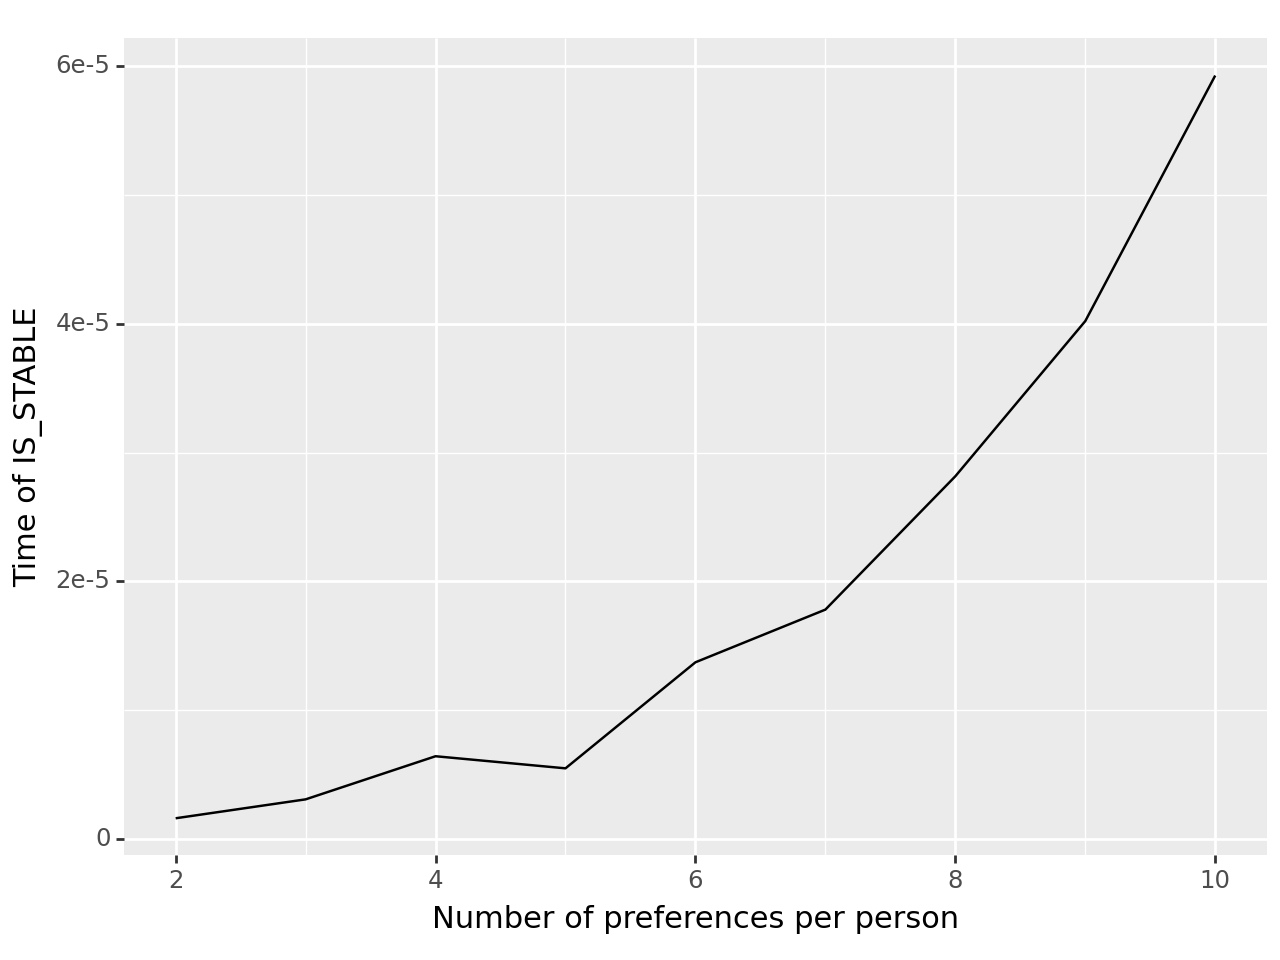

In [180]:
X_2 = np.arange(2,len(X)+1,1)
Y_2 = T_1
len(X)
df = pd.DataFrame({"X" : X_2,"Y" : Y_2})
df

p = ggplot(df,aes(x=X_2,y=Y_2))
p1 = p + geom_line()
p1 = p1 + labs(
    x = "Number of preferences per person",
    y = "Time of IS_STABLE"
  )
print(p1)


The above graph shows the time it takes for the IS_STABLE function to run when it takes different sizes of preference tables. The graph agrees with the assumption that the complexity of the IS_STABLE algorithm is $O(n^2)$, since the graph is approximately a quadratic shape and there exists an $M$ such that $f(n)\leq Mn^2$ (such as $M=0.001$), where $f(n)$ is the average time it takes IS_STABLE to run with $n$ number of preferences per person, which is equal to the number of men or women. Overall, the graph implies that the time complexity of IS_STABLE stated in Task 2 is accurate.

The function below is used to find the amount of time it takes the STABLE_MATCHING function to run. It is identical to the IS_STABLE_TIMING function, except it only runs and finds the mean over 10 random preference tables and random matchings rather than 100,000 and it finds the time it takes for STABLE_MATCHING to run as opposed to IS_STABLE. To get more accurate results, it would be better to increase the number of runs it performs, but this function was incredibly computationally expensive, so only 10 were ran.

In [23]:
def STABLE_MATCHINGS_TIMING(X,Y):
    times=list()
    for j in range(len(X)-1):
        X_1=X[0:j+2]
        Y_1=Y[0:j+2]
        Z=Random_Preference_Tables(X_1,Y_1)
        table_1=Z[0]
        table_2=Z[1]
        pairings=Random_Matchings(X_1,Y_1)
        start = time.perf_counter()
        for i in range(10) :
            STABLE_MATCHINGS(table_1,table_2)
        end = time.perf_counter()
        t=(end-start)/10
        times.append(t)
    return(times)

The STABLE_MATCHINGS_TIMING function will now run to find the relationship between the size of the preference tables and the time it takes for STABLE_MATCHINGS to run.

In [29]:
X=['A','B','C','D','E','F','G','H','I','J']
Y=['a','b','c','d','e','f','g','h','i','j']

T_2=STABLE_MATCHINGS_TIMING(X,Y)

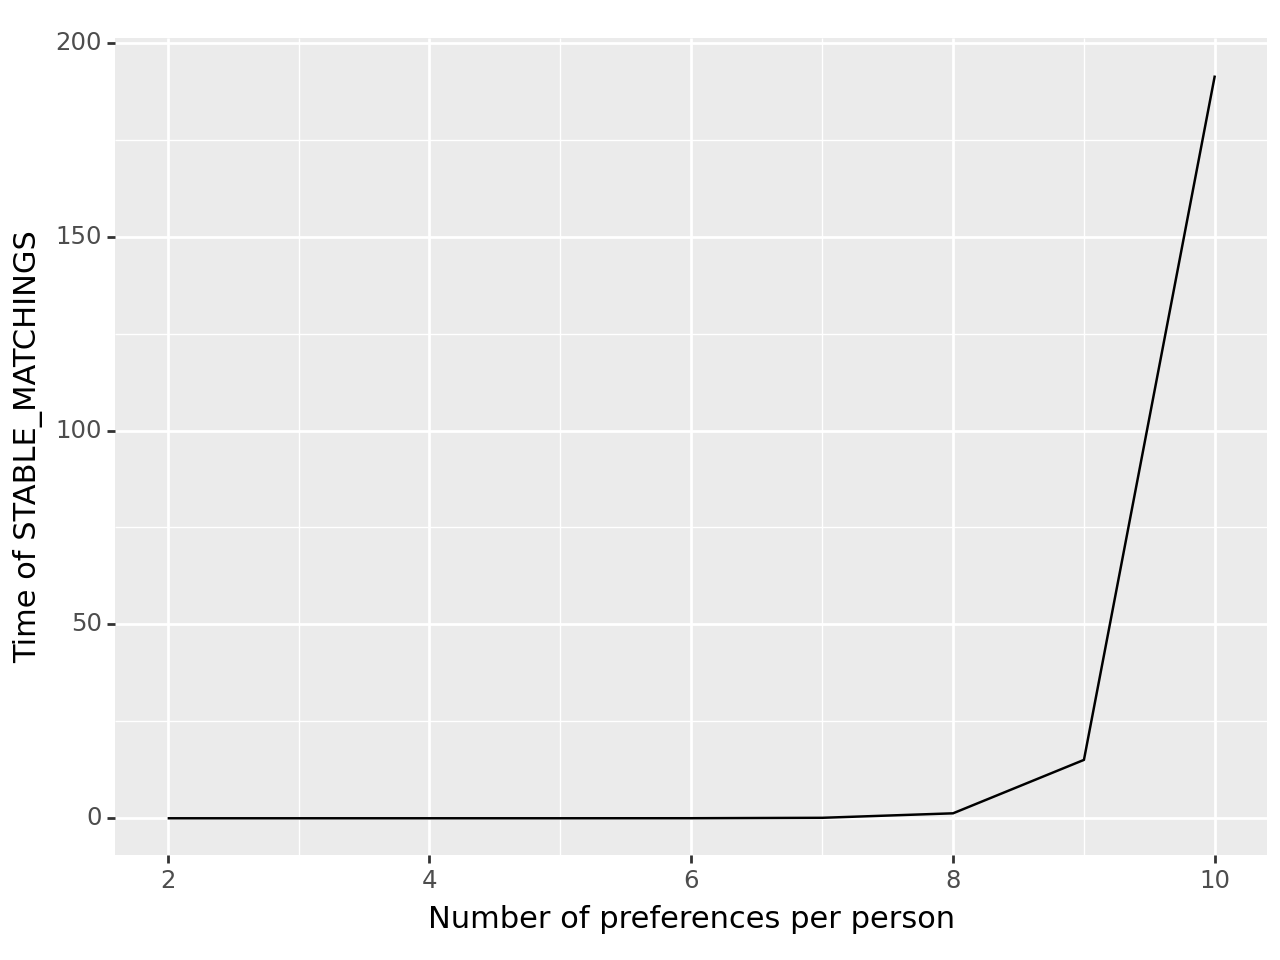

In [33]:
X_3 = np.arange(2,len(X)+1,1)
Y_3 = T_2
len(X)
df = pd.DataFrame({"X" : X_3,"Y" : Y_3})
df

p = ggplot(df,aes(x=X_3,y=Y_3))
p2 = p + geom_line()
p2 = p2 + labs(
    x = "Number of preferences per person",
    y = "Time of STABLE_MATCHINGS"
  )
print(p2)


The above graph shows the time it takes for the STABLE_MATCHINGS function to run while taking different sizes of preference tables. The graph agrees with the assumption that the complexity of the STABLE_MATCHINGS algorithm is $O(n!n^2)$, since the graph is approximately the same shape that one would expect from the graph $y=n!n^2$. Additionally, there exists an $M$ such that $f(n)\leq Mn!n^2$ (such as $M=1$) where $f(n)$ is the average time it takes IS_STABLE to run with $n$ number of preferences per person, which is equal to the number of men or women. Overall, the graph implies that the time complexity of STABLE_MATCHINGS stated in Task 3 is accurate.

### Task 7

#### Part a

The "very undesirable" imaginary man is added to all of the women's preference lists as their least favourable option, since he is every woman's most unwanted partner. He is then initially engaged to every woman and the Fundamental Algorithm improves their engagements, since the women will always have a more stable marriage than with him. This man does not need to be added to the list of the other men or given any preferences, as he is imaginary and will not be present in any table matchings.

If we begin with the women's preference table, B, then the function New_preferences adds the very undesirable man, called 'Z', to all of the women's preferences:

In [45]:
def New_preferences(B):
    
    for i in list(B.keys()):
        B[i].append('Z')
    return(B)
    

Below is an example of a preference table that has had the very undesirable imaginary man added to the women's preference list:

In [46]:
B = {
    'a': ['B','D','C','A'],
    'b': ['C','A','B','D'],
    'c': ['A','B','C','D'],
    'd': ['C','B','D','A']

}
New_preferences(B)

{'a': ['B', 'D', 'C', 'A', 'Z'],
 'b': ['C', 'A', 'B', 'D', 'Z'],
 'c': ['A', 'B', 'C', 'D', 'Z'],
 'd': ['C', 'B', 'D', 'A', 'Z']}

#### Part b

The function Fundamental_Algorithm function below takes two compatible preference tables, A and B, and uses the Fundamental Algorithm to produce a stable matching by using the very undesirable imaginary man.

In [47]:
def Fundamental_Algorithm(A,B):
    
    New_preferences(B)
    n=len(B)

    matchings=dict()
    k=0
    for j in list(B.keys()):
        matchings[j]=B[j][n]
        
    while k<n:
        X=list(A.keys())[k]
        while X!='Z':
            x=A[X][0]
            if B[x].index(X)<B[x].index(matchings[x]):
                Y=matchings[x]
                matchings[x]=X
                X=Y
            if X!='Z':
                A[X].remove(x)
        k=k+1
    
    return(matchings)

Here is an example of the Fundamental_Algorithm function producing a stable matching from two preference tables.

In [48]:
A = {
 'A':   ['a','b','d','c'],
 'B':   ['d','b','c','a'],
 'C':   ['c','a','b','d'],
 'D':   ['d','b','a','c']
 }
B = {
    'a': ['B','D','C','A'],
    'b': ['C','A','B','D'],
    'c': ['A','B','C','D'],
    'd': ['C','B','D','A']
}

Fundamental_Algorithm(A,B)

{'a': 'A', 'b': 'D', 'c': 'C', 'd': 'B'}

#### Part c

The preference tables for men and women are both dictionaries, because it is an efficient and easy way to relate each person to their preferences. The matchings are also dictionaries in this function, because I found it more efficient to update someone's partner through a dictionairy than with a list of tuples. 

The 'for' loop creates a dictionary of initial pairings of couples, so that part of the process has complexity $O(n)$. Then, the first 'while' loop loops over $n$ times in the worst case scenario. and therefore the complexity of Fundamental_Algorithm is $O(n+n)$=$O(n)$. By making a function called Fundamental_Algorithm_Timing that takes a list of men a list of women as its inputs, we can observe whether this is accurate.

In [49]:
def Fundamental_Algorithm_Timing(X,Y):
    times=list()
    for j in range(len(X)-1):
        X_1=X[0:j+2]
        Y_1=Y[0:j+2]
        Z=Random_Preference_Tables(X_1,Y_1)
        table_1=Z[0]
        table_2=Z[1]
        start = time.perf_counter()
        for i in range(1000000) :
            Fundamental_Algorithm(table_1,table_2)
        end = time.perf_counter()
        t=(end-start)/1000000
        times.append(t)
    return(times)

In [114]:
X=['A','B','C','D','E','F','G','H','I','J']
Y=['a','b','c','d','e','f','g','h','i','j']


T_3=Fundamental_Algorithm_Timing(X,Y)

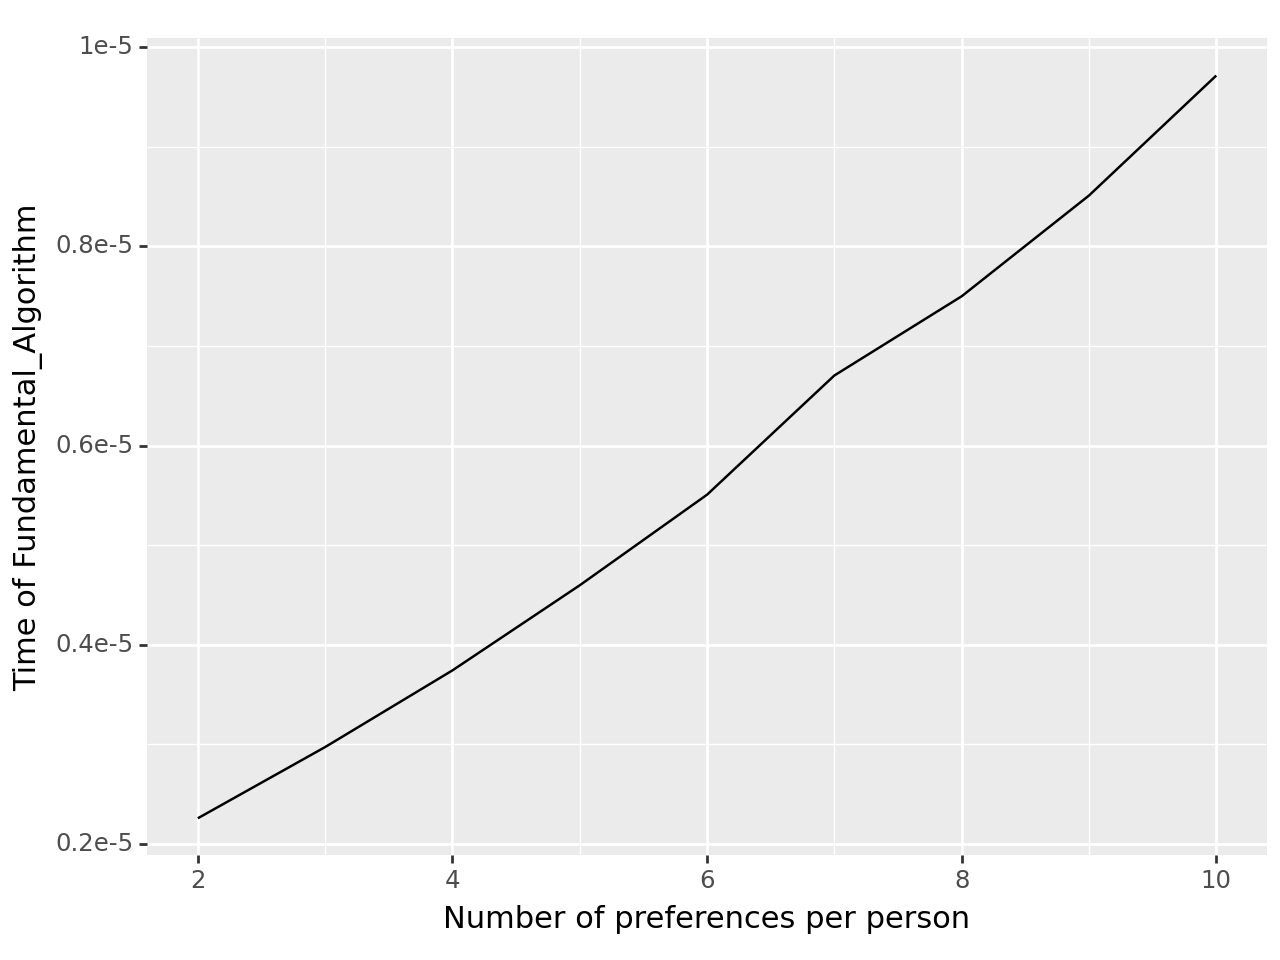

In [115]:
X_3 = np.arange(2,len(X)+1,1)
Y_3 = T_3
len(X)
df = pd.DataFrame({"X" : X_3,"Y" : Y_3})
df

p = ggplot(df,aes(x=X_3,y=Y_3))
p2 = p + geom_line()
p2 = p2 + labs(
    x = "Number of preferences per person",
    y = "Time of Fundamental_Algorithm"
  )
print(p2)

The graph shows that there is a linear relationship between $n$ and the time it takes for Fundamental_Algorithm to produce results. There exists an $M$ such that $f(n)\leq n$ (such as $M=0.001$) where 
$f(n)$ is the average time it takes Fundamental_Algorithm to run with $n$ number of preferences per person, which is equal to the number of men or women. Overall, the graph shows that the time complexity of Fundamental_Algorithm being $O(n)$ is accurate.

### Task 8

Rather than the inputs being lists, the preference tables could be a data frame, which uses 'pandas'. The following function, Random_Matchings_pddataframe, uses pandas data frame preference tables as inputs and have an output of a pandas data frame matching.

In [50]:
def Random_Matchings_pddataframe(X,Y):
    n = len(X.values.tolist())
    M = dict()
    F = dict()
    for l in range(n):
        name_1=(X.columns.tolist())[l]
        M[name_1]=X[name_1].tolist()
        name_2=(Y.columns.tolist())[l]
        F[name_2]=Y[name_2].tolist()
    
    
    X_1=list(M.keys())
    Y_1=list(F.keys())
    men = list()
    women=list()
    n=len(X_1)
    while n>0:
        x = random.sample(Y_1,1)[0]
        y = random.sample(X_1,1)[0]
        X_1.remove(str(y))
        Y_1.remove(str(x))
        s = y[0]
        t = x[0]
        men.append(s)
        women.append(t)
        Data=dict()
        Data["Men"]=men
        Data["Women"]=women
        n=n-1
    return(pd.DataFrame(Data))

In [51]:
A = pd.DataFrame({
 'A':   ['F','G','I','H'],
 'B':   ['I','G','H','F'],
 'C':   ['H','F','G','I'],
 'D':   ['I','G','F','H']
 })
B = pd.DataFrame({
    'F': ['B','D','C','A'],
    'G': ['C','A','B','D'],
    'H': ['A','B','C','D'],
    'I': ['C','B','D','A']
})
Random_Matchings_pddataframe(A,B)

,Men,Women
0,A,I
1,D,G
2,C,F
3,B,H


### Task 9

#### Testing stability

One thing that we can do to test the Fundamental_Algorithm function is to check that the output is indeed a stable matching with the function IS_Fundamental_Algorithm_STABLE, in which we simply need to input the names of the men and women in lists A and B respectively. This function uses the Random_Preference_Tables function from Task 4 to produce random preference tables to be used, and it runs over 1000 randomly produced tables to test the stability of the the matching produced from the Fundamental_Algorithm from Task 7. The IS_STABLE function from Task 2 is implemented to help with confirming the stability. The IS_STABLE allows the input 'pairings' as a list, but the Fundamental_Algorithm function outpus the pairings as a dictionary, so they must be converted to a list first, which is done in the function Convert, which is embedded in IS_Fundamental_Algorithm_STABLE, making it a closure.

The Fundamental_Algorithm should always produce a stable matching, so if any of the 1000 results show that the matching is unstable, the Fundamental_Algorithm is incorrect, whereas if all of the results show the matching is stable, we are quite sure that the function works correctly. To increase our confidence in how well the function works, the number of runs should be increased, but this function will never be able to prove for 100% sure that the algorithm always produces a stable matchings.

In [52]:
def IS_Fundamental_Algorithm_STABLE(A,B):
    
    V=list()
    for j in range(1000):
        K=Random_Preference_Tables(A,B)
        X=K[0]
        Y=K[1]
        x=Fundamental_Algorithm(X,Y)
    
        def Convert(x):
            n=len(x)
            pairings=list()
            for i in range(n):
                a=tuple(x)[i]
                b=x[a]
                t=tuple(b)
                t=t+tuple(a)
                pairings.append(t)
            return(pairings)
            
        pairs=Convert(x)
        s=(IS_STABLE(X,Y,pairs))
        V.append(s)
    if 'Not stable' in V:
        return('Fundamental_Algorithm does not always produce stable matchings')
    else:
        return('Fundemantal_Algorithm most likely always produces stable matchings')



The example below shows the result from using the IS_Fundamental_Algorithm_STABLE. The function returns our belief about the accuracy of the Fundamental_Algorithm function.

In [53]:
X=['A','B','C','D','E','F','G','H','I','J']
Y=['a','b','c','d','e','f','g','h','i','j']

IS_Fundamental_Algorithm_STABLE(X,Y)

'Fundemantal_Algorithm most likely always produces stable matchings'

This test should always release the same output, saying 'Fundamental_Algorithm most likely always produces stable matchings', so this test helps with repeatability.

#### Testing number inputs

Another test we can do is to see how whether the Fundamental_Algorithm works when we use numbers to represent the men and women's names. We will call A a list of numbers representing the men and B a list of numbers representing the women. By again producing random preference tables from the function in Task 4, we can test Fundamental_Algorithm to see if it is able to produce a matching by creating a function called Test_Fundamental_Algorithm that takes lists of names (or in this case numbers) and outputs a stable matching.

In [54]:
def Test_Fundamental_Algorithm(A,B):
    Z=Random_Preference_Tables(A,B)
    X=Z[0]
    Y=Z[1]
    
    return(Fundamental_Algorithm(X,Y))

In [55]:
import random
random.seed(10)
A=[1,2,3,4,5]
B=[6,7,8,9,10]
Test_Fundamental_Algorithm(A,B)

{6: 3, 7: 2, 8: 4, 9: 5, 10: 1}

As can be seen above, the Fundamental_Algorithm function is able to work with numbers representing people rather than words, since it was absle to successfully find a stable matching.

#### Testing inputs with the same names

A final thing that we can do to test the Fundamental_Algorithm functiion is to test what happens if the preference tables have someone with the same name, to see if it still is able to produce a matching. To test if this can happen or not, we will do some examples and examine the outputs while using the Test_Fundamental_Algorithm.

#### Example 1

In [56]:
A=['Paul','John','Greg','Peter','Simon','Paul']
B=['Beth', 'Monica','Lisa','Heather','Claire','Nia']

Test_Fundamental_Algorithm(A,B)

IndexError: list index out of range

In that example, there are two men called Paul, and in this case the Fundamental_Algorithm is unable to find a stable matching. This shows that if you have two men with the same name, then there needs to be a way to distinguish them, for example calling them 'Paul_1' and 'Paul_2' or calling them 'Paul_Robinson' and 'Paul_Jones'.

#### Example 2

In [57]:
A=['Paul','John','Greg','Peter','Simon','David']
B=['Beth', 'Monica','Lisa','Heather','Claire','Monica']

Test_Fundamental_Algorithm(A,B)

IndexError: list index out of range

This second exampleshows that when there are two women with the same name (Monica), then again the Fundamental_Algorithm function again does not work, and they need to be distinguished in some way.

#### Example 3

In [58]:
A=['Paul','John','Greg','Peter','Simon','Alex']
B=['Beth', 'Monica','Lisa','Heather','Claire','Alex']

Test_Fundamental_Algorithm(A,B)

{'Beth': 'Paul',
 'Monica': 'Peter',
 'Lisa': 'Greg',
 'Heather': 'Alex',
 'Claire': 'Simon',
 'Alex': 'John'}

In this example, there were a man and woman both called Alex. This example shows that when there are people with the same name in diferent groups, the Fundamental_Algorithm is able to find a stable matching.